In [38]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('white')
sys.path.insert(0, '../')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style('white')
sns.set(font_scale=2.0)
%matplotlib inline
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
bj_nb_weight = np.load('/Users/towardsun/Documents/Workspace/python/mobike-dist/logs/e1cb8b5a-31a1-11e8-a81a-6a00022fd770/kernel_weight.npy')

In [3]:
kernel, bias = bj_nb_weight

In [4]:
width, height, depth, filters = kernel.shape

In [5]:
from const import FEATURES

## Kernel Plot

In [6]:
f_index = 0
f_kerenl = kernel[:, :, :, f_index]

In [7]:
f_kerenl.shape

(5, 5, 60)

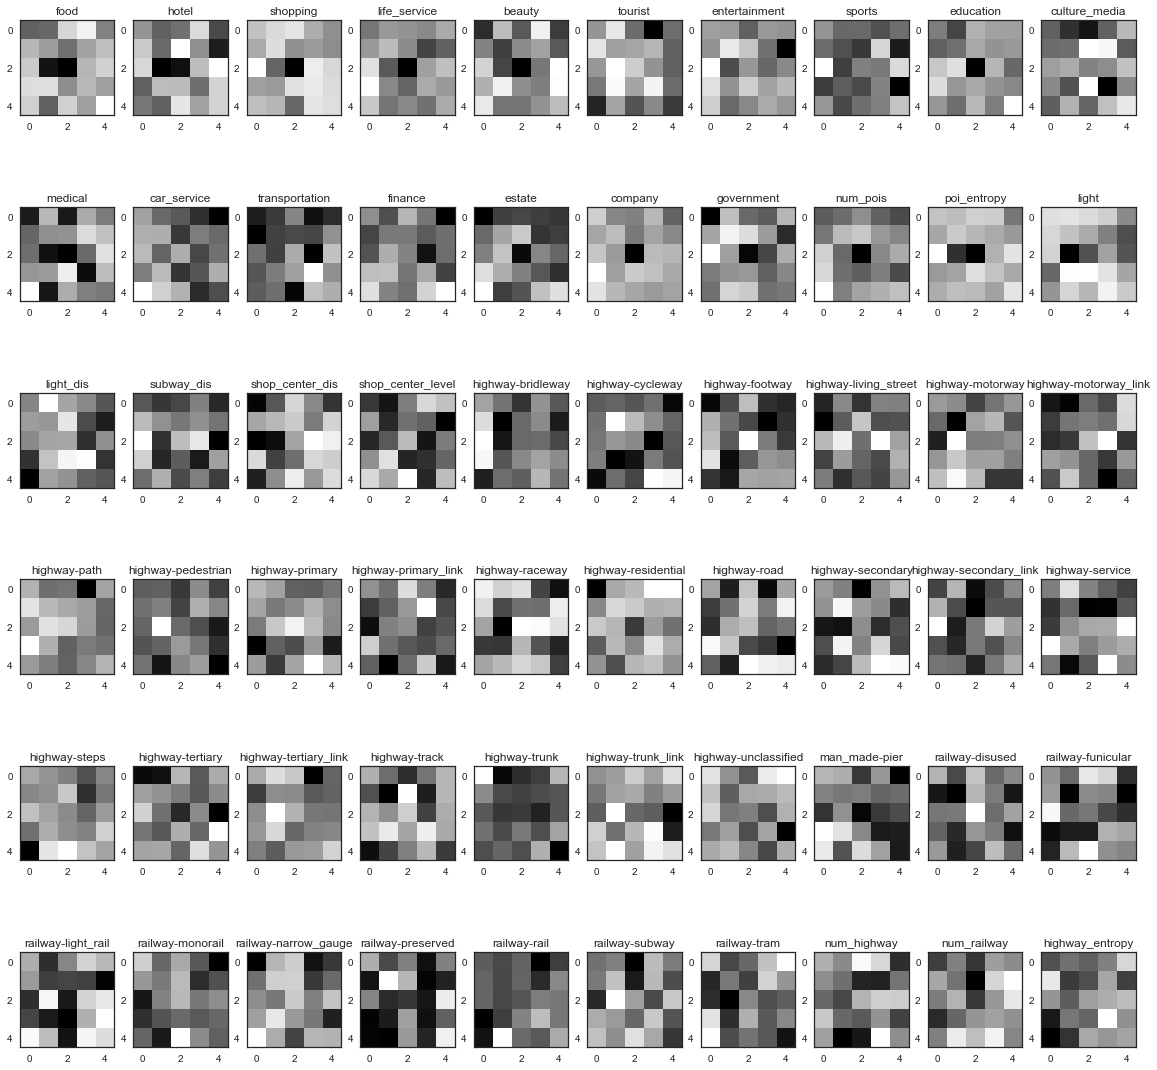

In [8]:
plt.figure(figsize=(20, 20))
for i, f in enumerate(FEATURES):
    plt.subplot(6, 10, i + 1)
    plt.imshow(f_kerenl[:,:,i],interpolation="nearest",cmap="gray")
    plt.title(f)
plt.show()

## Feature Importance

In [9]:
feature_array = kernel.swapaxes(0, 2)

In [10]:
feature_array = feature_array.reshape(feature_array.shape[0], feature_array.shape[1] * feature_array.shape[2] * feature_array.shape[3])

In [11]:
feature_array.shape

(60, 250)

In [12]:
importances = np.linalg.norm(feature_array, ord=2, axis=-1)

In [13]:
imp_df = pd.DataFrame({
    'feature': FEATURES,
    'importance': importances
})

In [14]:
imp_df.sort_values('importance', ascending=False, inplace=True)
imp_df

,feature,importance
22,shop_center_dis,1.317709
18,poi_entropy,1.246447
51,railway-monorail,1.092634
24,highway-bridleway,0.994839
3,life_service,0.902535
10,medical,0.893900
15,company,0.852420
2,shopping,0.847529
41,highway-tertiary,0.846133
19,light,0.828118


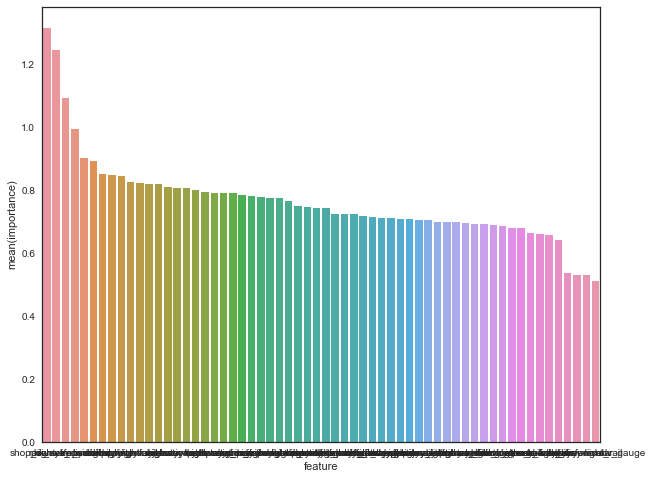

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(imp_df.feature, imp_df.importance)

## Location Importance

In [16]:
location_array = kernel.reshape(kernel.shape[0], kernel.shape[1], kernel.shape[2] * kernel.shape[3])

In [17]:
loc_importances = np.linalg.norm(location_array, ord=2, axis=-1)

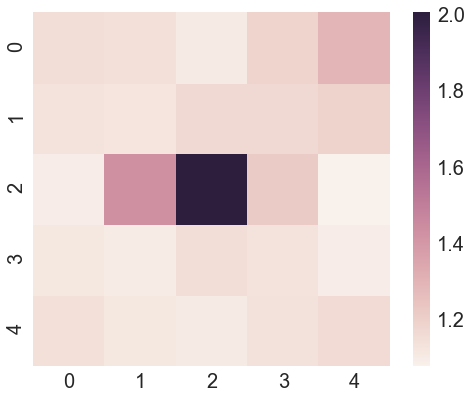

In [61]:
pp = PdfPages('/Users/towardsun/Downloads/IEEEtran-2/results/location_imp.pdf')
plt.figure(figsize=(8, 6.5))
sns.heatmap(loc_importances)
plt.savefig(pp, format='pdf')
pp.close()

## Reduced Dimension Impact

In [76]:
res_df = pd.read_csv('/Users/towardsun/Documents/Workspace/python/mobike-dist/results/s_sh_t_nb.csv')
res_df = res_df[(res_df.y_scale == False) & (res_df.model_choice == 'cnn')]
res_df.drop_duplicates(['model_choice', 'reducer_choice', 'n_components', 'y_scale'], inplace=True)
res_df.sort_values(['reducer_choice', 'n_components'], inplace=True)
res_df.head()

,model_choice,reducer_choice,n_components,y_scale,train_rmse,val_rmse,test_rmse,s_kl,s_rmlse,t_kl,t_rmlse,model_path
28,cnn,fa,2,False,10.824336,12.029086,11.258673,0.108988,0.677302,0.096974,0.693964,./logs/0321091239/best_model_1_2.h5
10,cnn,fa,6,False,8.915096,10.990607,11.223126,0.081339,0.628281,0.092098,0.680302,./logs/0321091239/best_model_4_2.h5
42,cnn,fa,10,False,9.557599,10.765522,12.005098,0.094788,0.663364,0.101696,0.683120,./logs/0321091239/best_model_7_0.h5
4,cnn,fa,14,False,9.272373,10.565679,11.208075,0.085524,0.654823,0.087834,0.619280,./logs/0321091239/best_model_10_2.h5
0,cnn,fa,18,False,7.919280,9.815209,11.409955,0.067030,0.597076,0.085618,0.589646,./logs/0321091239/best_model_13_2.h5


In [77]:
fa_res = res_df[res_df.reducer_choice == 'fa']
pca_res = res_df[res_df.reducer_choice == 'pca']
tca_res = res_df[res_df.reducer_choice == 'tca']

In [78]:
linewidth = 4
markersize = 16

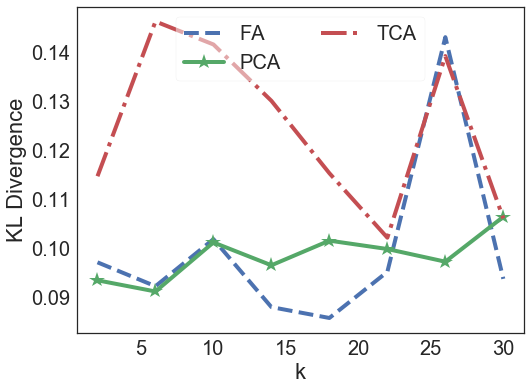

In [80]:
plt.figure(figsize=(8, 6))

pp = PdfPages('/Users/towardsun/Downloads/IEEEtran-2/analysis/fa_component_analysis.pdf')

plt.plot(fa_res.n_components, fa_res.t_kl, 'C0--', linewidth=linewidth, markersize=markersize)
plt.plot(pca_res.n_components, pca_res.t_kl, 'C1-*',linewidth=linewidth, markersize=markersize)
plt.plot(tca_res.n_components, tca_res.t_kl, 'C2-.', linewidth=linewidth, markersize=markersize)

plt.legend(['FA', 'PCA', 'TCA'], loc=9, frameon=True, ncol=2, framealpha=0.5)
plt.xlabel('k')
plt.ylabel('KL Divergence')
plt.savefig(pp, format='pdf')
# plt.ylim(0, 0.2)
pp.close()
plt.show()

## Feature Importance

In [68]:
city = ['SH->BJ'] * 4 + ['SH->NB'] * 4 + ['BJ->NB'] * 4
features = ['POI', 'Road', 'CityCenter', 'All'] * 3
kl = [0.116, 0.154, 0.106, 0.079, 0.118, 0.150, 0.162, 0.082, 0.100, 0.110, 0.146, 0.097]
rmlse = [0.794, 0.872, 0.751, 0.654, 0.770, 0.851, 0.931, 0.662, 0.710, 0.721, 0.823, 0.731]

In [69]:
f_imp_df = pd.DataFrame({
    'city': city,
    'features': features,
    'kl': kl,
    'rmlse': rmlse
})

In [70]:
f_imp_df

,city,features,kl,rmlse
0,SH->BJ,POI,0.116,0.794
1,SH->BJ,Road,0.154,0.872
2,SH->BJ,CityCenter,0.106,0.751
3,SH->BJ,All,0.079,0.654
4,SH->NB,POI,0.118,0.770
5,SH->NB,Road,0.150,0.851
6,SH->NB,CityCenter,0.162,0.931
7,SH->NB,All,0.082,0.662
8,BJ->NB,POI,0.100,0.710
9,BJ->NB,Road,0.110,0.721


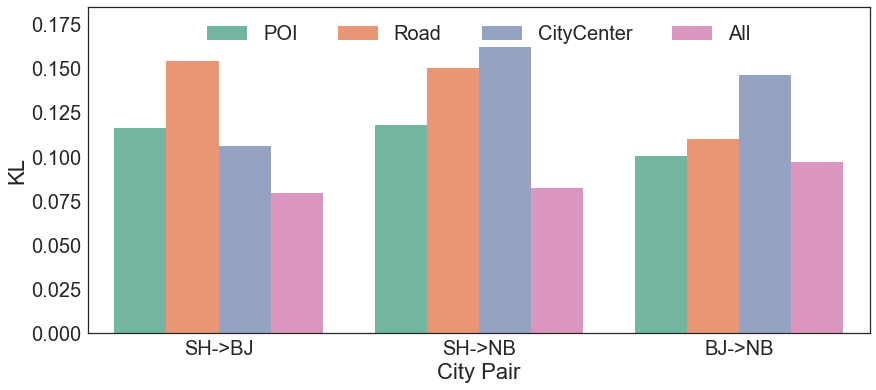

In [71]:
sns.set_style('white')
pp = PdfPages('/Users/towardsun/Downloads/IEEEtran-2/results/feature_kl.pdf')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 6))

sns.barplot(x="city", y='kl', hue='features', data=f_imp_df, ax=ax, palette="Set2")
plt.xlabel('City Pair')
plt.ylabel('KL')
plt.ylim(0.0, 0.185)
plt.legend(loc=9, ncol=4)
fig.savefig(pp, format='pdf')
pp.close()

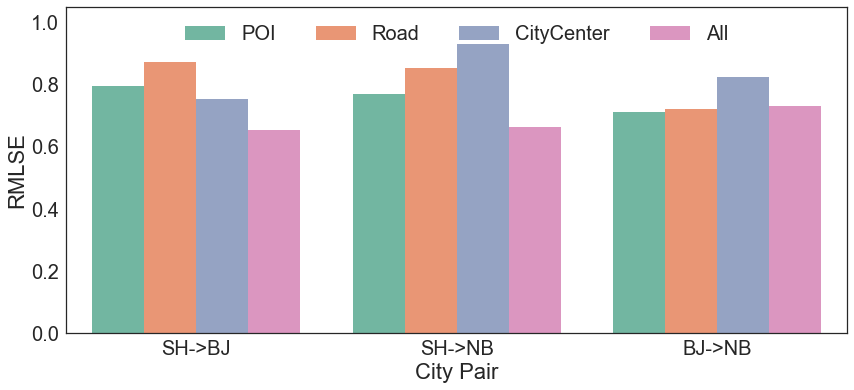

In [72]:
sns.set_style('white')
pp = PdfPages('/Users/towardsun/Downloads/IEEEtran-2/results/feature_rmlse.pdf')

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 6))

sns.barplot(x="city", y='rmlse', hue='features', data=f_imp_df, ax=ax, palette="Set2")
plt.xlabel('City Pair')
plt.ylabel('RMLSE')
plt.ylim(0.0, 1.05)
plt.legend(loc=9, ncol=4)
fig.savefig(pp, format='pdf')
pp.close()